# MNIST Data Practice  / Testing Retuning Layers

In [1]:
import numpy as np
import keras
from keras import layers

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

In [4]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/15


422/422 [==============================] - 23s 50ms/step - loss: 0.3750 - accuracy: 0.8875 - val_loss: 0.0889 - val_accuracy: 0.9748
Epoch 2/15
422/422 [==============================] - 17s 41ms/step - loss: 0.1112 - accuracy: 0.9660 - val_loss: 0.0585 - val_accuracy: 0.9835
Epoch 3/15
422/422 [==============================] - 20s 48ms/step - loss: 0.0834 - accuracy: 0.9743 - val_loss: 0.0510 - val_accuracy: 0.9870
Epoch 4/15
422/422 [==============================] - 22s 52ms/step - loss: 0.0718 - accuracy: 0.9773 - val_loss: 0.0426 - val_accuracy: 0.9890
Epoch 5/15
422/422 [==============================] - 22s 52ms/step - loss: 0.0602 - accuracy: 0.9804 - val_loss: 0.0408 - val_accuracy: 0.9882
Epoch 6/15
422/422 [==============================] - 21s 50ms/step - loss: 0.0562 - accuracy: 0.9828 - val_loss: 0.0372 - val_accuracy: 0.9905
Epoch 7/15
422/422 [==============================] - 21s 49ms/step - loss: 0.0505 - accuracy: 0.9845 - val_loss: 0.0339 - val_accura

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.023849068209528923
Test accuracy: 0.9914000034332275


In [7]:
# Adjusting the model architecture for fine-tuning 
model = keras.Sequential([
    keras.Input(shape=input_shape),
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    # Additional Conv2D and BatchNormalization layers
    layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    # Flattening once before Dense layers
    layers.Flatten(),
    layers.Dropout(0.4),  # Adjusted dropout rate
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.4),
    layers.Dense(num_classes, activation="softmax"),
])

# Showing the model summary to inspect the architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 batch_normalization (Batch  (None, 3, 3, 128)        

In [8]:
# Re-compiling the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Re-training the model
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 24s 52ms/step - loss: 0.3983 - accuracy: 0.8743 - val_loss: 0.1259 - val_accuracy: 0.9775
Epoch 2/15
422/422 [==============================] - 21s 49ms/step - loss: 0.1333 - accuracy: 0.9619 - val_loss: 0.0532 - val_accuracy: 0.9837
Epoch 3/15
422/422 [==============================] - 20s 47ms/step - loss: 0.1015 - accuracy: 0.9709 - val_loss: 0.0571 - val_accuracy: 0.9832
Epoch 4/15
422/422 [==============================] - 20s 47ms/step - loss: 0.0850 - accuracy: 0.9749 - val_loss: 0.0612 - val_accuracy: 0.9825
Epoch 5/15
422/422 [==============================] - 22s 51ms/step - loss: 0.0703 - accuracy: 0.9791 - val_loss: 0.0544 - val_accuracy: 0.9852
Epoch 6/15
422/422 [==============================] - 23s 55ms/step - loss: 0.0627 - accuracy: 0.9814 - val_loss: 0.0407 - val_accuracy: 0.9890
Epoch 7/15
422/422 [==============================] - 22s 53ms/step - loss: 0.0578 - accuracy: 0.9832 - val_loss: 0.0472 - val_accuracy:

In [9]:
# Re-evaluating the model
score = model.evaluate(x_test, y_test, verbose=0)
print("Fine-tuned model test loss:", score[0])
print("Fine-tuned model test accuracy:", score[1])

Fine-tuned model test loss: 0.04964873194694519
Fine-tuned model test accuracy: 0.9884999990463257


In [10]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Define the checkpoint and early stopping with the new file name
checkpoint_path = "practice_model.hdf5"  # Updated file path to save the best model
checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
                             monitor='val_accuracy', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='max')

early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=3, 
                               verbose=1, 
                               mode='min', 
                               restore_best_weights=True)

# Add callbacks to the training call
history = model.fit(x_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    validation_split=0.1,
                    callbacks=[checkpoint, early_stopping])

# After training, if you wish to load the best model (now named "practice_model"), do:
# model.load_weights(checkpoint_path)

# Evaluate the best (practice) model
score = model.evaluate(x_test, y_test, verbose=0)
print("Practice model test loss:", score[0])
print("Practice model test accuracy:", score[1])

Epoch 1/15
422/422 [==============================] - ETA: 0s - loss: 0.0273 - accuracy: 0.9914
Epoch 1: val_accuracy improved from -inf to 0.99017, saving model to practice_model.hdf5


C:\Users\shane\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


422/422 [==============================] - 17s 36ms/step - loss: 0.0273 - accuracy: 0.9914 - val_loss: 0.0378 - val_accuracy: 0.9902
Epoch 2/15
422/422 [==============================] - ETA: 0s - loss: 0.0290 - accuracy: 0.9906
Epoch 2: val_accuracy did not improve from 0.99017
422/422 [==============================] - 12s 28ms/step - loss: 0.0290 - accuracy: 0.9906 - val_loss: 0.0453 - val_accuracy: 0.9877
Epoch 3/15
421/422 [============================>.] - ETA: 0s - loss: 0.0243 - accuracy: 0.9927
Epoch 3: val_accuracy improved from 0.99017 to 0.99233, saving model to practice_model.hdf5
422/422 [==============================] - 12s 28ms/step - loss: 0.0242 - accuracy: 0.9927 - val_loss: 0.0367 - val_accuracy: 0.9923
Epoch 4/15
422/422 [==============================] - ETA: 0s - loss: 0.0239 - accuracy: 0.9924
Epoch 4: val_accuracy did not improve from 0.99233
422/422 [==============================] - 12s 29ms/step - loss: 0.0239 - accuracy: 0.9924 - val_loss: 0.0422 - val_acc

In [11]:
from keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator with desired augmentations
datagen = ImageDataGenerator(
    rotation_range=10,  # Random rotations in degrees
    zoom_range=0.01,  # Random zoom
    width_shift_range=0.1,  # Random horizontal shifts
    height_shift_range=0.1,  # Random vertical shifts
)

# Fit the generator to your data
datagen.fit(x_train)

In [12]:
model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
          epochs=epochs,
          validation_data=(x_test, y_test),
          callbacks=[checkpoint, early_stopping])

Epoch 1/15
469/469 [==============================] - ETA: 0s - loss: 0.2042 - accuracy: 0.9408
Epoch 1: val_accuracy did not improve from 0.99233
469/469 [==============================] - 26s 52ms/step - loss: 0.2042 - accuracy: 0.9408 - val_loss: 0.0510 - val_accuracy: 0.9832
Epoch 2/15
469/469 [==============================] - ETA: 0s - loss: 0.1474 - accuracy: 0.9567
Epoch 2: val_accuracy did not improve from 0.99233
469/469 [==============================] - 23s 50ms/step - loss: 0.1474 - accuracy: 0.9567 - val_loss: 0.0362 - val_accuracy: 0.9890
Epoch 3/15
469/469 [==============================] - ETA: 0s - loss: 0.1356 - accuracy: 0.9609
Epoch 3: val_accuracy did not improve from 0.99233
469/469 [==============================] - 23s 49ms/step - loss: 0.1356 - accuracy: 0.9609 - val_loss: 0.0363 - val_accuracy: 0.9883
Epoch 4/15
469/469 [==============================] - ETA: 0s - loss: 0.1211 - accuracy: 0.9639
Epoch 4: val_accuracy did not improve from 0.99233
469/469 [====

In [13]:
model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
          epochs=epochs,
          validation_data=(x_test, y_test),
          callbacks=[checkpoint, early_stopping])

Epoch 1/15
469/469 [==============================] - ETA: 0s - loss: 0.1339 - accuracy: 0.9611
Epoch 1: val_accuracy did not improve from 0.99233
469/469 [==============================] - 24s 51ms/step - loss: 0.1339 - accuracy: 0.9611 - val_loss: 0.0367 - val_accuracy: 0.9876
Epoch 2/15
469/469 [==============================] - ETA: 0s - loss: 0.1233 - accuracy: 0.9642
Epoch 2: val_accuracy did not improve from 0.99233
469/469 [==============================] - 23s 49ms/step - loss: 0.1233 - accuracy: 0.9642 - val_loss: 0.0382 - val_accuracy: 0.9873
Epoch 3/15
468/469 [============================>.] - ETA: 0s - loss: 0.1167 - accuracy: 0.9661
Epoch 3: val_accuracy did not improve from 0.99233
469/469 [==============================] - 24s 51ms/step - loss: 0.1167 - accuracy: 0.9661 - val_loss: 0.0380 - val_accuracy: 0.9882
Epoch 4/15
468/469 [============================>.] - ETA: 0s - loss: 0.1074 - accuracy: 0.9689
Epoch 4: val_accuracy did not improve from 0.99233
Restoring mod

In [15]:
from keras.models import load_model
# Path to your saved model
saved_model_path = 'practice_model.hdf5'

# Load the saved model
practice_model = load_model(saved_model_path)

In [16]:
# Assuming you have x_train, y_train prepared and the same batch_size and epochs as before
practice_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 14s 31ms/step - loss: 0.0223 - accuracy: 0.9928 - val_loss: 0.0418 - val_accuracy: 0.9910
Epoch 2/15
422/422 [==============================] - 13s 30ms/step - loss: 0.0258 - accuracy: 0.9922 - val_loss: 0.0456 - val_accuracy: 0.9897
Epoch 3/15
422/422 [==============================] - 12s 29ms/step - loss: 0.0213 - accuracy: 0.9929 - val_loss: 0.0398 - val_accuracy: 0.9915
Epoch 4/15
422/422 [==============================] - 13s 30ms/step - loss: 0.0218 - accuracy: 0.9931 - val_loss: 0.0404 - val_accuracy: 0.9918
Epoch 5/15
422/422 [==============================] - 13s 30ms/step - loss: 0.0206 - accuracy: 0.9932 - val_loss: 0.0362 - val_accuracy: 0.9923
Epoch 6/15
422/422 [==============================] - 13s 31ms/step - loss: 0.0183 - accuracy: 0.9941 - val_loss: 0.0388 - val_accuracy: 0.9917
Epoch 7/15
422/422 [==============================] - 13s 32ms/step - loss: 0.0204 - accuracy: 0.9934 - val_loss: 0.0516 - val_accuracy:

In [17]:
# Evaluate the model
score = practice_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# Make predictions
predictions = practice_model.predict(x_test)

Test loss: 0.053445182740688324
Test accuracy: 0.9891999959945679
313/313 [==============================] - 4s 4ms/step


In [18]:
training_history = practice_model.history

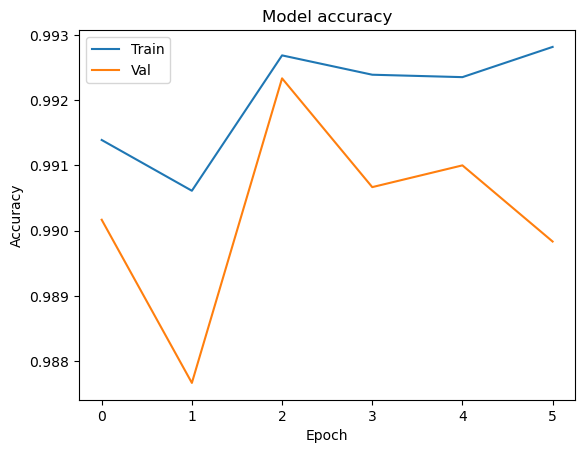

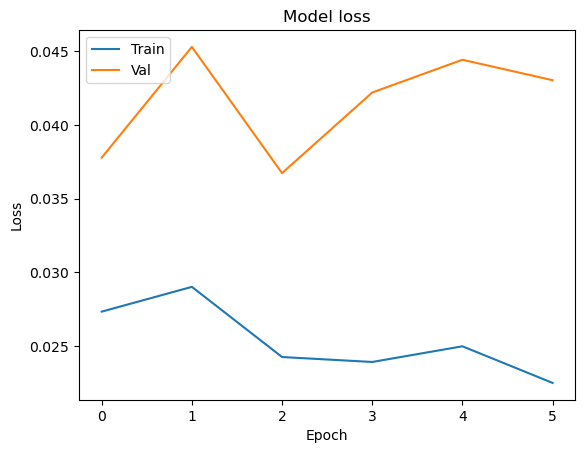

In [20]:
import matplotlib.pyplot as plt

# First, ensure you access the history attribute of the History object
training_history_dict = history.history

# Plot training & validation accuracy values
plt.plot(training_history_dict['accuracy'])
plt.plot(training_history_dict['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')  # Changed 'Test' to 'Val' for clarity
plt.show()

# Plot training & validation loss values
plt.plot(training_history_dict['loss'])
plt.plot(training_history_dict['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')  # Changed 'Test' to 'Val' for clarity
plt.show()